In [46]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

SyntaxError: invalid syntax (<ipython-input-46-d960544c3de0>, line 1)

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [20]:
loc = '../data/'
file = 'data_features_outliers_detected.csv'
data = pd.read_csv(loc+file)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6314,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685,False,False
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685,False,False
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685,False,False


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [21]:
data = data[(data.outlier == False)&(data.lof_outlier == False)].reset_index(drop=True)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
5433,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685,False,False
5434,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685,False,False
5435,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685,False,False


#### <span style='color:green'> **[done]** </span>Filter by weight-class:

In [22]:
weight = 'Welterweight'
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

df = data[data['weight_class']==weight].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
929,lose,Daiju Takase,Fabiano Iha,2000-12-16,Welterweight,KO/TKO,Punches,-0.001066,-0.295020,-0.385877,0.014263,-1.135164,-1.011946,-1.7,-0.782314,-1.394544,-0.531929,0.435720,1.572764,-0.795015,-0.735539,1.742336,False,False
930,lose,Matt Hughes,Dennis Hallman,2000-12-16,Welterweight,SUB,Armbar,-0.001066,0.036425,0.399174,-0.843823,0.658187,0.339218,-0.9,0.639445,0.751337,-0.373837,0.870134,0.494223,2.497700,-0.363380,0.574988,False,False
931,lose,John Alessio,Pat Miletich,2000-06-09,Welterweight,SUB,Armbar,-0.001066,-0.295020,-0.778402,0.872349,-0.053549,0.547090,0.2,0.192786,-0.486672,0.796042,-0.780638,0.116418,-2.453751,-2.224172,0.574988,False,False


In [23]:
req_data = ['date','fighter','opponent','result','method']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = []

for column in df.columns:
    if ('_dif' in column and column not in y) or 'ratio' in column:
        X.append(column)

df = df[req_data + y + X]
df.head(3)

,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2023-04-08,Jorge Masvidal,Gilbert Burns,lose,U-DEC,-0.001066,-0.110884,-1.563453,0.014263,-0.429032,0.858897,-0.3,0.419261,0.008532,-0.045006,0.870134,0.116418,-0.349384,-0.735539,2.326009
1,2023-04-08,Kevin Holland,Santiago Ponzinibbio,win,KO/TKO,1.345659,0.809797,0.006649,0.014263,0.209849,-0.353686,0.5,-0.492929,0.916404,-1.063117,-0.780638,0.116418,-0.151326,0.380937,-0.592359
2,2023-03-18,Gunnar Nelson,Bryan Barberena,win,SUB,-0.001066,0.110079,0.399174,0.872349,0.988836,0.408509,0.7,-2.499748,1.081472,-1.151649,0.435720,1.485340,0.220033,0.753095,-1.176033


## <span style='color:green'> **[done]** </span> XGBoost regressor model training:

In [33]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(932, 21), train_set=(456, 11), validation_set=(191, 11), test_set=(285, 11)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
929,train,2000-12-16,Daiju Takase,Fabiano Iha,lose,KO/TKO,-0.001066,-0.295020,-0.385877,0.014263,-1.135164,-1.011946,-1.7,-0.782314,-1.394544,-0.531929,0.435720,1.572764,-0.795015,-0.735539,1.742336
930,train,2000-12-16,Matt Hughes,Dennis Hallman,lose,SUB,-0.001066,0.036425,0.399174,-0.843823,0.658187,0.339218,-0.9,0.639445,0.751337,-0.373837,0.870134,0.494223,2.497700,-0.363380,0.574988
931,train,2000-06-09,John Alessio,Pat Miletich,lose,SUB,-0.001066,-0.295020,-0.778402,0.872349,-0.053549,0.547090,0.2,0.192786,-0.486672,0.796042,-0.780638,0.116418,-2.453751,-2.224172,0.574988


In [36]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
929,train,2000-12-16,Daiju Takase,Fabiano Iha,lose,KO/TKO,-0.001066,-0.295020,-0.385877,0.014263,-1.135164,-1.011946,-1.7,-0.782314,-1.394544,-0.531929,0.435720,1.572764,-0.795015,-0.735539,1.742336,0.003145,0.003145,0.003145,0.003145
930,train,2000-12-16,Matt Hughes,Dennis Hallman,lose,SUB,-0.001066,0.036425,0.399174,-0.843823,0.658187,0.339218,-0.9,0.639445,0.751337,-0.373837,0.870134,0.494223,2.497700,-0.363380,0.574988,-0.010092,-0.010092,-0.010092,-0.010092
931,train,2000-06-09,John Alessio,Pat Miletich,lose,SUB,-0.001066,-0.295020,-0.778402,0.872349,-0.053549,0.547090,0.2,0.192786,-0.486672,0.796042,-0.780638,0.116418,-2.453751,-2.224172,0.574988,-0.062059,-0.062059,-0.062059,-0.062059


In [39]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.845500


### <span style='color:orange'> **[in-progress]** </span>GridSearch (=Parameter tuning):

In [40]:
parameters = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
              #'max_depth': [2, 3, 6],
              'subsample': [0.7, 0.8, 0.85, 0.9, 0.95],
              'n_estimators':[100, 200, 300, 350, 400]
}

xgboost_reg = XGBRegressor(objective='reg:squarederror') #objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgboost_reg, param_grid=parameters, cv=3,error_score='raise')

X_train = df[X][df.set=='train']
y_train = df[y][df.set=='train']
grid_search.fit(X_train,y_train)

#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

GridSearchCV(cv=3, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estima

In [39]:
grid_search.best_estimator_
grid_search.get_params()
#grid_search.scorer_

{'cv': 3,
 'error_score': 'raise',
 'estimator__objective': 'reg:squarederror',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__callbacks': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__early_stopping_rounds': None,
 'estimator__enable_categorical': False,
 'estimator__eval_metric': None,
 'estimator__feature_types': None,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__grow_policy': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_bin': None,
 'estimator__max_cat_threshold': None,
 'estimator__max_cat_to_onehot': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__max_leaves': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimat

In [42]:
grid = pd.DataFrame(grid_search.cv_results_['params'])
#rmse = np.power(grid_search.cv_results_['mean_test_score'],0.5)

grid['squared_error'] = grid_search.cv_results_['mean_test_score'] #grid_search.cv_results_['mean_test_score']
g = grid[grid.squared_error==np.min(grid.squared_error)].reset_index(drop=True)
g

,learning_rate,n_estimators,subsample,squared_error
0,0.25,100,0.7,0.063834


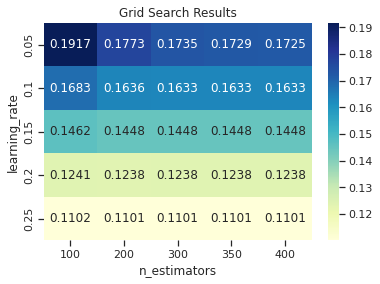

In [43]:
# Create a pivot table of the results
X_axis = 'n_estimators'
y_axis = 'learning_rate'
table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns=X_axis)

# Create a heatmap plot of the results
sns.heatmap(table, cmap='YlGnBu', annot=True, fmt='.4g')
plt.title('Grid Search Results')
plt.xlabel(X_axis)
plt.ylabel(y_axis)
plt.show()


#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [44]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=g.loc[0,'n_estimators'], learning_rate=g.loc[0,'learning_rate'], subsample=g.loc[0,'subsample'], max_depth=len(X))
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
929,train,2000-12-16,Daiju Takase,Fabiano Iha,lose,KO/TKO,-0.001066,-0.295020,-0.385877,0.014263,-1.135164,-1.011946,-1.7,-0.782314,-1.394544,-0.531929,0.435720,1.572764,-0.795015,-0.735539,1.742336,-0.000840,-0.000840,-0.000840,-0.000840
930,train,2000-12-16,Matt Hughes,Dennis Hallman,lose,SUB,-0.001066,0.036425,0.399174,-0.843823,0.658187,0.339218,-0.9,0.639445,0.751337,-0.373837,0.870134,0.494223,2.497700,-0.363380,0.574988,-0.001540,-0.001540,-0.001540,-0.001540
931,train,2000-06-09,John Alessio,Pat Miletich,lose,SUB,-0.001066,-0.295020,-0.778402,0.872349,-0.053549,0.547090,0.2,0.192786,-0.486672,0.796042,-0.780638,0.116418,-2.453751,-2.224172,0.574988,-0.000978,-0.000978,-0.000978,-0.000978


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [47]:
save_trained_model(model=xgboost_reg,filename_path='../global_variables/stats_pred_' + set_lower_cases(weight) + '_xgboost_reg')

../global_variables/stats_pred_welterweight_xgboost_reg.pkl saved.


#### <span style='color:green'> **[done]** </span> Saving statistic prediction data:

In [48]:
df.to_csv('../data/model_stats_pred_' + set_lower_cases(weight) + '_data_trained.csv', index=None)
print('../data/model_stats_pred_' + set_lower_cases(weight) + '_data_trained.csv saved.')

../data/model_stats_pred_welterweight_data_trained.csv saved.


#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [49]:
g
        

,learning_rate,n_estimators,subsample,squared_error
0,0.25,100,0.7,0.063834


In [50]:
param = pd.DataFrame(data={'ml_model':['xgboost_regressor'],
                          'parameter_name':['n_estimators'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )

param.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')

NameError: name 'opt_n_estimators' is not defined

In [14]:
>>>

## <span style='color:green'> **[done]** </span> Random Forest regression model training:

In [15]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(951, 26), train_set=(470, 12), validation_set=(216, 12), test_set=(265, 12)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,train,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244,-0.542656,-0.542656,-0.542656,-0.542656
949,train,2017-07-29,Demian Maia,Tyron Woodley,lose,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244,-0.335153,-0.335153,-0.335153,-0.335153
950,test,2017-07-29,Donald Cerrone,Robbie Lawler,lose,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244,-0.079794,-0.079794,-0.079794,-0.079794


In [16]:
rf_reg = set_random_forest_reg(X_columns=X, y_columns=y, data=df, n_estimators=10)
df = set_predictions(model=rf_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,train,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244,-0.031073,-0.031073,-0.031073,-0.031073
949,train,2017-07-29,Demian Maia,Tyron Woodley,lose,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244,-1.072566,-1.072566,-1.072566,-1.072566
950,test,2017-07-29,Donald Cerrone,Robbie Lawler,lose,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244,-0.272999,-0.272999,-0.272999,-0.272999


In [17]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.859350


#### <span style='color:green'> **[done]** </span> Tune Model parameters:

In [18]:
sum_table = pd.DataFrame(columns=['n_estimators','kd_accuracy','str_accuracy','td_accuracy','sub_accuracy','mean_accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256]):
    sum_table = pd.concat([sum_table,get_grad_desc_step(X_columns=X, y_columns=y, data=df, n=n)],ignore_index=True)

sum_table.tail(5)

  0%|          | 0/8 [00:00<?, ?it/s]


NameError: name 'get_grad_desc_step' is not defined

In [ ]:
sns.scatterplot(data=sum_table, x='n_estimators', y='mean_accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='mean_accuracy')

t = sum_table[sum_table.mean_accuracy == np.max(sum_table['mean_accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'mean_accuracy']
t

#### <span style='color:green'> **[done]** </span> Tuned model score:

In [ ]:
print('Model Accuracy(=1-percentage error):')
acc = []
for stat in ['kd','str','sub','td']:
    act = df[stat + '_dif'][df.set=='test']
    pred = df[stat + '_dif_pred'][df.set=='test']
    acc.append(get_mean_percentage_error(act=act, pred=pred))
    print(stat + '_dif Accuracy: ' + str(get_mean_percentage_error(act=act, pred=pred)))
print('\nOverall score: %.4f' %np.mean(acc))    